In [1]:
# Two-class/binary classififcation example: Classifying movie reviews
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
# Working with the "IMDB dataset"
# It is preprocessed: the reviews (sequence of words) have been turned into sequences of integers, where each integers stands for a specific word in a dictionary
from keras.datasets import imdb
# Only keep the top 10000 most frequently occuring words in the training data.
# Rare words will be discarded. (about 80Mb)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data[0] # the first data

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0] # the first label, 0 is negative, 1 is positive

1

In [4]:
# Optional
# Get the reviews back to English words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
# Preparing the data. Lists of integers --> tensors
# 1. pad the list so that they have the same length, turn them into integer tensor of shape (samples, word_indices)
# 2. Encode lists into vectors 0s and 1s --> we use this
import numpy as np
# dimension is 10000 because we limited 10000 words
# sequences is the list we want to input, test_data / train_data, the maximum length is 9999
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences))
    results = np.zeros((len(sequences), dimension))
    # enumerate: list the data and index at the same time
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1
    return results
# vectorized training_data
x_train = vectorize_sequences(train_data)
print(x_train)
print("---------------------------------")
# vectorized test_data
x_test = vectorize_sequences(test_data)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
---------------------------------
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [6]:
# vectorize the labels 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# Input data is vectors. Labels are scalars (1s and 0s).
# How many layers to use
# How many "hidden units" to chose for each layer
# 3 layers
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # First-layer , 16 hidden-units , relu as activation function
model.add(layers.Dense(16, activation='relu')) # Second-layer , 16 hidden-units , relu as activation function
model.add(layers.Dense(1, activation='sigmoid')) # Third-layer , 1 hidden-unit

In [8]:
# add optimizer and loss function to the network
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

'''
# Can be rewritten as:
# lr = learning rate
# metric is a function that is used to judge the performance of the model
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              matrics=[metrics.binary_accuracy])
'''

'\n# Can be rewritten as:\n# lr = learning rate\n# metric is a function that is used to judge the performance of the model\nfrom keras import optimizers\nfrom keras import losses\nfrom keras import metrics\n\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n              loss = losses.binary_crossentropy,\n              matrics=[metrics.binary_accuracy])\n'

In [9]:
# Create validation data for check the validation of data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.4978 - accuracy: 0.7822 - val_loss: 0.3618 - val_accuracy: 0.8775
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2846 - accuracy: 0.9062 - val_loss: 0.2967 - val_accuracy: 0.8865
Epoch 3/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2077 - accuracy: 0.9316 - val_loss: 0.2759 - val_accuracy: 0.8900
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1643 - accuracy: 0.9463 - val_loss: 0.2811 - val_accuracy: 0.8865
Epoch 5/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1322 - accuracy: 0.9573 - val_loss: 0.2875 - val_accuracy: 0.8857
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1085 - accuracy: 0.9665 - val_loss: 0.3175 - val_accuracy: 0.8819
Epoch 7/20
15000/15000 [==============================] - 1s 81us/s

In [11]:
# model.fit() returns a History object. It object has a member history.
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [12]:
# plot the training and validation loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# 'bo' is blue dot
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is solid blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# overfitting: validation loss too high
# 1. decrease number of epoch (I would try to do this)
# 2. Keras drop  (Do this too = =)

<Figure size 640x480 with 1 Axes>

No handles with labels found to put in legend.


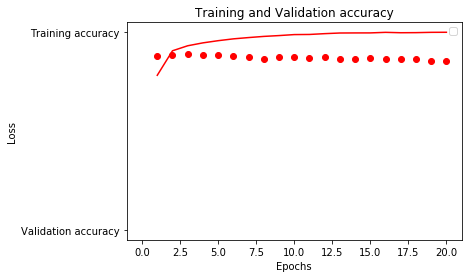

In [13]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']   
plt.plot(epochs, val_acc, 'ro', 'Validation accuracy')
plt.plot(epochs, acc, 'r', 'Training accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Overfitting is occured. We decrease the epoch times in order to avoid overfitting.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
            metrics=['accuracy'])
history1 = model.fit(partial_x_train,partial_y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
15000/15000 [==============================] - 1s 62us/step - loss: 0.5107 - accuracy: 0.7914
Epoch 2/4
15000/15000 [==============================] - 1s 62us/step - loss: 0.3032 - accuracy: 0.8988
Epoch 3/4
15000/15000 [==============================] - 1s 53us/step - loss: 0.2212 - accuracy: 0.9271
Epoch 4/4
25000/25000 [==============================] - 2s 66us/step


In [15]:
results

[0.2928682534742355, 0.8826000094413757]

In [18]:
# Use dropout to decrease overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
# Dropped half of the units
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])       
history2 = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.6364 - accuracy: 0.6306 - val_loss: 0.5332 - val_accuracy: 0.8342
Epoch 2/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.5130 - accuracy: 0.7665 - val_loss: 0.4090 - val_accuracy: 0.8683
Epoch 3/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.4244 - accuracy: 0.8250 - val_loss: 0.3530 - val_accuracy: 0.8815
Epoch 4/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.3621 - accuracy: 0.8609 - val_loss: 0.3120 - val_accuracy: 0.8818
Epoch 5/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.3136 - accuracy: 0.8862 - val_loss: 0.2806 - val_accuracy: 0.8918
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2732 - accuracy: 0.9042 - val_loss: 0.2711 - val_accuracy: 0.8944
Epoch 7/20
15000/15000 [==============================] - 1s 84us/st

In [19]:
# model.fit() returns a History object. It object has a member history.
history_dict = history2.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [21]:
# Do the same thing in the above
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc)+1)

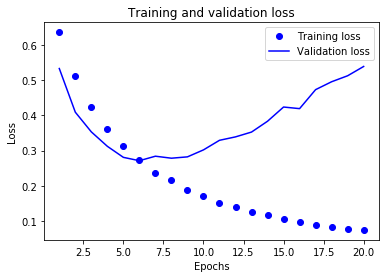

In [22]:
# Plot the training and validation loss side by side again
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

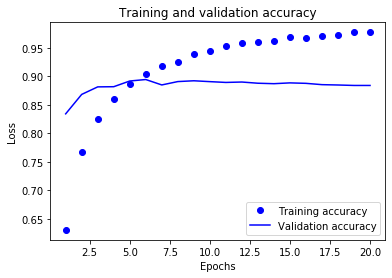

In [23]:
# Plot the training and validation accuracy side by side again
# Overfitting is not exist
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()